In [74]:
import numpy as np
import scipy as sp 
from numpy.linalg import matrix_power as mp
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import matplotlib_settting
from functions import Spectral, polyeig
from tqdm import tqdm

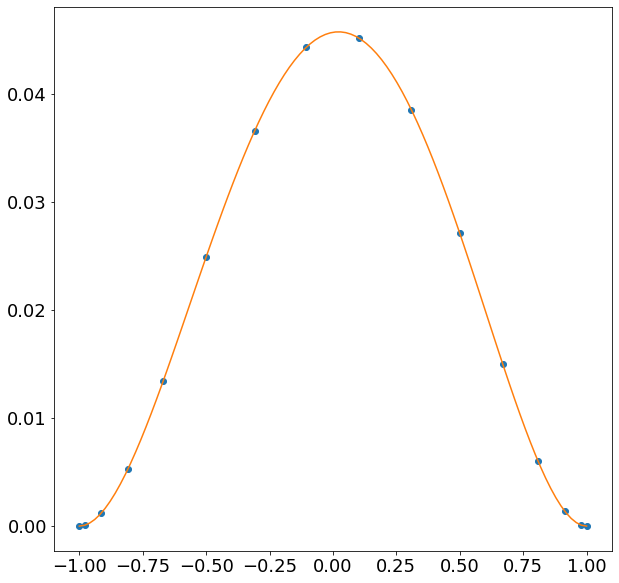

In [2]:
# solve u_xxxx = exp(x), u(-1)=u(1)=u'(-1)=u(1)=0

N = 15
spectral = Spectral(N,"symmetric","CH")
x = spectral.x
D = spectral.D1

S = np.diag([0, *(1/(1-x[1:N]**2)), 0])
D4 = (np.diag(1-x**2)@np.linalg.matrix_power(D,4) - 8*np.diag(x)@np.linalg.matrix_power(D,2) - 12*np.linalg.matrix_power(D,2))@S
D4 = D4[1:N,1:N]

f = np.exp(x)
f = f[1:N]

u = np.linalg.solve(D4,f)
u = np.pad(u,1) # pad 0 on both ends

plt.plot(x,u,'o')
xx = np.linspace(-1,1,100)
uu = (1-xx**2)*np.polyval(np.polyfit(x,S@u,N),xx)
plt.plot(xx,uu)

$$ u_{xxxx} + u_{xxx} = \lambda u_{xx},\;\;\; u(\pm 2)=u_x(\pm 2)=0,\;\;\; -2<x<2 $$

Let the interpolant be $p(x)$ be $ p(x) = (4-x^2)q(x)$ where $q(x)$ satisfies the boundary condition $q(\pm 2)=0$. This way the $u_x(\pm 2)=0$ condition can be automatically satisfied.

$$
\begin{align*}
p_{x}(x) &= (4-x^2)q_{x}(x) - 2xq(x) \\
p_{xx}(x) &= (4-x^2)q_{xx}(x) - 4xq_{x}(x) - 2q(x) \\
p_{xxx}(x) &= (4-x^2)q_{xxx}(x) - 6xq_{xx}(x) - 6q_{x}(x) \\
p_{xxxx}(x) &= (4-x^2)q_{xxxx}(x) - 8xq_{xxx}(x) - 12q_{xx}(x) 
\end{align*}
$$

Let $p(x_j) = v_j = u(x_j)$, then $q(x_j) = v_j/(4-x^2)$. The discretization of origin equation becomes a generalized eigenvalue problem
$$ L\mathbf{v} = \lambda R\mathbf{v} $$
where 
$$
\begin{align*}
L &= \left[ (4-x^2)D^4 + (4-8x-x^2)D^3 - (12+6x)D^2 - 6D \right] \times diag(1/(4-x^2)) \\
R &= \left[ (4-x^2)D^2 - 4xD - 2I \right] \times diag(1/(4-x^2))
\end{align*}
$$

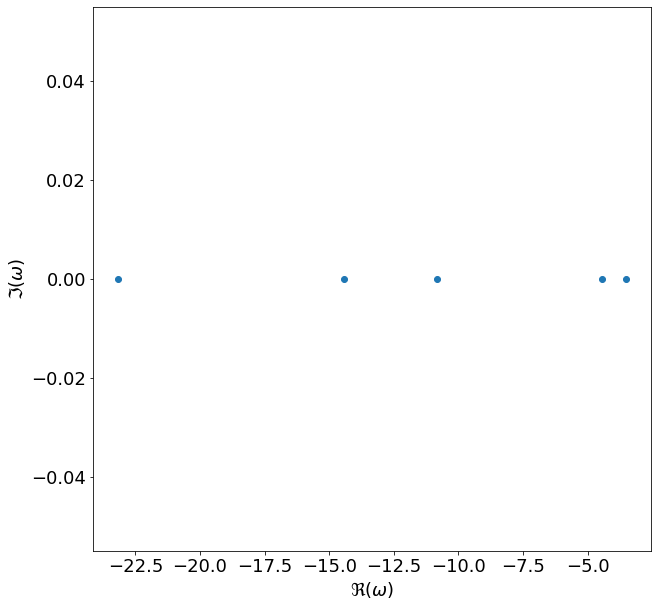

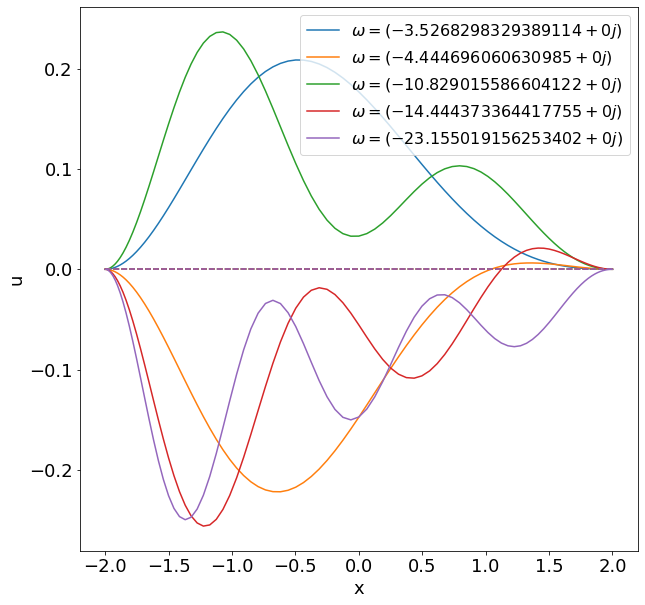

In [29]:
N = 100
spectral = Spectral(N,"symmetric", "CH")
x = spectral.x
D = spectral.D1

# shift the domain from [-1,1] to [-2,2]
x = 2*x
D = D/2

S = np.diag([0, *(1/(4-x[1:N]**2)), 0])
D4 = (np.diag(4-x**2)@mp(D,4) - 8*np.diag(x)@mp(D,3) - 12*mp(D,2))@S
#D3 = (np.diag(4-x**2)@mp(D,3) - 6*np.diag(x)@mp(D,2) - 6*D)@S 
D3 = mp(D,3)
#L = (np.diag(4-x**2)@mp(D,4) + np.diag(4-8*x-x**2)@mp(D,3) - np.diag(12+6*x)@mp(D,2) - 6*D)@S
L = D4 + D3
L = L[1:N,1:N]
R = (np.diag(4-x**2)@mp(D,2) - 4*np.diag(x)@D - 2*np.eye(D.shape[0]))@S
#R = mp(D,2)
R = R[1:N,1:N]

omega, V = sp.linalg.eig(L,R)
V = np.pad(V, ((1,1),(0,0)), constant_values=0)

index = np.argsort(omega)[::-1]
V = V[:,index]
omega = omega[index]

V = V[:,:5]
omega = omega[:5]

plt.figure()
plt.plot(np.real(omega), np.imag(omega), 'o')
plt.xlabel("$\Re(\omega)$")
plt.ylabel("$\Im(\omega)$")

plt.figure()
for i in range(5):
    v = V[:,i]
    plt.plot(x, np.real(v), '-', color=f"C{i}", label=f"$\omega={omega[i]}$")
    plt.plot(x, np.imag(v), '--', color=f"C{i}")
plt.xlabel("x")
plt.ylabel("u")
plt.legend()

The above equation is similar to
$$ v_{xx} + v_x = \lambda v, v(\pm 2)=0 $$
if we set $v=u_{xx}$.

The exact eigenvalues to this problem are
$$ \lambda = -\frac{1}{4} - \frac{n^2\pi^2}{16} $$


approximated: [ -0.86685028  -2.7174011   -5.80165248 -10.1196044  -15.67125688]
exact: [ -0.86685028  -2.7174011   -5.80165248 -10.1196044  -15.67125688]


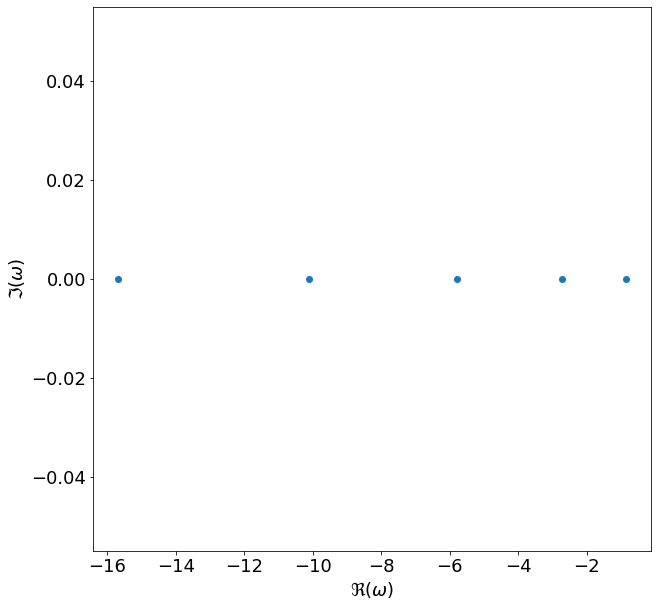

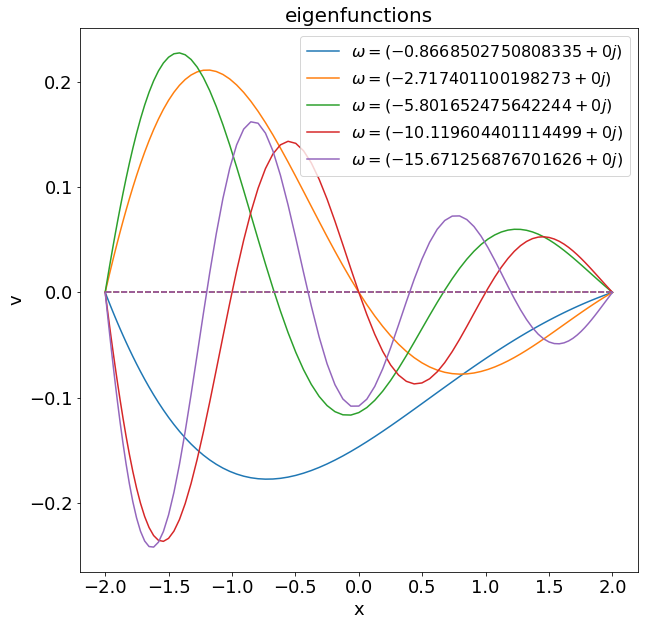

In [41]:
N = 100
spectral = Spectral(N,"symmetric", "CH")
x = spectral.x
D = spectral.D1

# shift the domain from [-1,1] to [-2,2]
x = 2*x
D = D/2

L = mp(D,2) + D
L = L[1:N,1:N]
#R = (np.diag(4-x**2)@mp(D,2) - 4*np.diag(x)@D - 2*np.eye(D.shape[0]))@S
R = np.eye(D.shape[0])
R = R[1:N,1:N]

omega, V = sp.linalg.eig(L,R)
V = np.pad(V, ((1,1),(0,0)), constant_values=0)

index = np.argsort(omega)[::-1]
V = V[:,index]
omega = omega[index]

V = V[:,:5]
omega = omega[:5]


print("approximated:", np.real(omega[:5]))
print("exact:", -1/4-np.arange(1,6)**2*np.pi**2/16)

plt.figure()
plt.plot(np.real(omega), np.imag(omega), 'o')
plt.xlabel("$\Re(\omega)$")
plt.ylabel("$\Im(\omega)$")

plt.figure()
for i in range(5):
    v = V[:,i]
    plt.plot(x, np.real(v), '-', color=f"C{i}", label=f"$\omega={omega[i]}$")
    plt.plot(x, np.imag(v), '--', color=f"C{i}")
plt.xlabel("x")
plt.ylabel("v")
plt.title("eigenfunctions")
plt.legend()

Text(0.5, 1.0, 'exact solution')

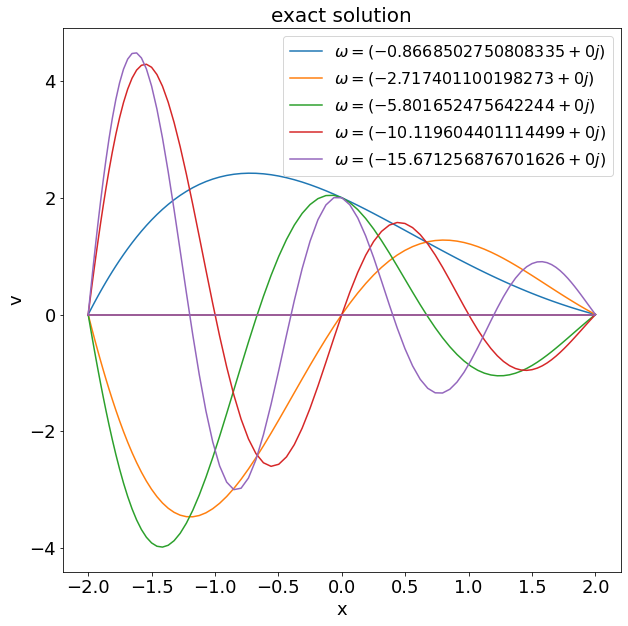

In [39]:
for i, w in enumerate(omega):
    sq = np.sqrt(1+4*w)
    exact = np.exp(-2*sq - 0.5*(sq+1)*x)*(np.exp(sq*(x+2))-1)
    plt.plot(x,np.real(exact),color=f"C{i}",label=f"$\omega={w}$")
    plt.plot(x,np.imag(exact),color=f"C{i}")
plt.legend()
plt.xlabel("x")
plt.ylabel("v")
plt.title("exact solution")

## Psudospectra

100%|██████████| 101/101 [02:45<00:00,  1.63s/it]


Text(0.5, 1.0, 'Psudospectra')

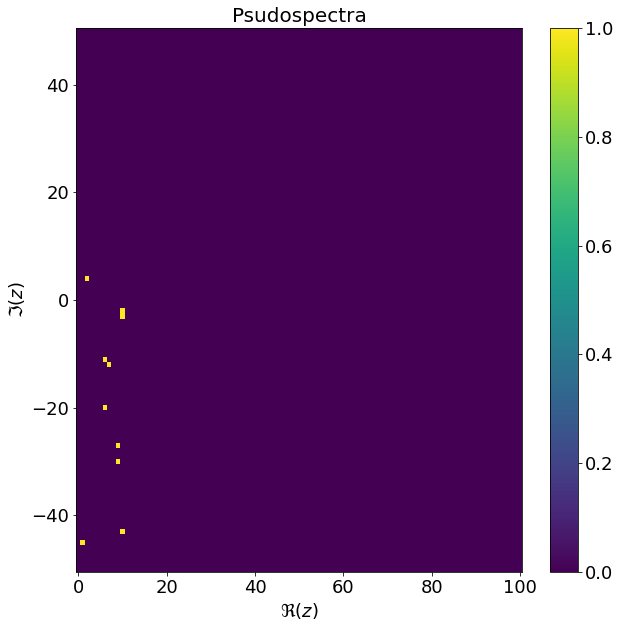

In [15]:
tol = 1e-14
A = np.block([[O,I], [-(1-v0**2)*D2, -2j*v0*D]])
Re_range = np.arange(101,dtype=float)
Im_range = np.arange(-50,51,dtype=float)
Re, Im = np.meshgrid(Re_range, Im_range)
psudospetra = np.zeros_like(Re)
for i,re in enumerate(tqdm(Re_range)):
    for j,im in enumerate(Im_range):
        z = re + 1j*im
        s = sp.linalg.svdvals(A - z*np.eye(A.shape[0]))[-1] # svd values are sorted in decreasing order
        if (s < tol):
            psudospetra[i,j] = 1
plt.pcolormesh(Re,Im, psudospetra)
plt.colorbar()
plt.xlabel("$\Re(z)$")
plt.ylabel("$\Im(z)$")
plt.title("Psudospectra")